In [ ]:
check_search = False
check_execute = False

In [102]:
import numpy
import pandas
import seaborn
from graphviz import Digraph

In [120]:
def searcher(a, q, d, if_cp, if_d, last_p):
    
    print("IF CP: {0}".format(if_cp))
    print("IF D: {0}".format(if_d))
    
    gc = Digraph(comment='pydge')
    gc.attr(size="10.0, 10.0")
    
    _currency_palette_pre_values = seaborn.color_palette("flare", numpy.unique(a['currency'].values).shape[0]).as_hex()
    _currency_palette_keys = numpy.unique(a['currency'].values)
    currency_palette = {_currency_palette_keys[j]: _currency_palette_pre_values[j] for j in range(len(_currency_palette_keys))}
    _unique_exchanges = numpy.unique(a['exchange'].values)
    for ex in _unique_exchanges:
        a_slice = a[a['exchange'] == ex].copy()
        with gc.subgraph(name='cluster_' + ex) as sgc:
            sgc.attr(label=ex)
            for i, row in a_slice.iterrows():
                node_name = row['exchange'] + '/' + row['currency']
                node_label = row['currency'] + '\n[' + str(row['amount']) + ']'
                node_color = currency_palette
                sgc.node(name=node_name, label=node_label, 
                         color='#000000',
                         fillcolor=currency_palette[row['currency']],
                         penwidth='1', style='filled')
                
    
    a_diff = numpy.random.normal(size=(a.shape[0],))
    q_diff = numpy.random.normal(size=(q.shape[0],))
    
    a['amount'] += a_diff
    q['amount'] += q_diff
    
    if if_cp:
        cp = pandas.DataFrame(
                   {'time': [d['time'].max() + 1], 
                    'first_from_exchange': ['binance'], 'first_from_currency': ['btc'], 
                    'first_to_exchange': ['binance'], 'first_to_currency': ['usdt'],
                    'second_from_exchange': ['okx'], 'second_from_currency': ['usdt'], 
                    'second_to_exchange': ['okx'], 'second_to_currency': ['btc'],
                    'first_amount': [100], 'second_amount': [1]}
        )
        
        _e = cp.copy()
        
        if if_d:

            d = pandas.concat((deals_data, 
                               cp), axis=0,
                               ignore_index=True)
            
    else:
        cp = pandas.DataFrame(columns=['time', 
                                       'first_from_exchange', 'first_from_currency', 
                                       'first_to_exchange', 'first_to_currency',
                                       'second_from_exchange', 'second_from_currency',
                                       'second_to_exchange', 'second_to_currency',
                                       'first_amount', 'second_amount'
                                       ])
        
        d = pandas.concat((deals_data, 
                   last_p), axis=0,
                   ignore_index=True)
        _e = last_p.copy()
    if if_cp or if_d:
        for i, row in _e.iterrows():
            first_tail_node_name = row['first_from_exchange'] + '/' + row['first_from_currency']
            first_head_node_name = row['first_to_exchange'] + '/' + row['first_to_currency']
            second_tail_node_name = row['second_from_exchange'] + '/' + row['second_from_currency']
            second_head_node_name = row['second_to_exchange'] + '/' + row['second_to_currency']

            first_edge_label = str(row['first_amount']) + ' ' + row['first_from_currency']
            second_edge_label = str(row['second_amount']) + ' ' + row['second_from_currency']

            gc.edge(tail_name=first_tail_node_name, head_name=first_head_node_name, 
                    label=first_edge_label, penwidth='1',
                    style='solid')
            gc.edge(tail_name=second_tail_node_name, head_name=second_head_node_name, 
                    label=second_edge_label, penwidth='1',
                    style='solid')
    
    print(cp)
    return a, q, d, cp, gc

In [121]:
allocation_data = pandas.read_csv('./allocations.csv')
quotes_data = pandas.read_csv('./quotes.csv')

deals_data = pandas.DataFrame(columns=[
    'time', 
    'first_from_exchange', 'first_from_currency', 'first_to_exchange', 'first_to_currency',
    'second_from_exchange', 'second_from_currency', 'second_to_exchange', 'second_to_currency',
    'first_amount', 'second_amount'])

current_proposition = pandas.DataFrame()

In [122]:
allocation_data, quotes_data, deals_data, current_proposition, graph_code = searcher(allocation_data, quotes_data, deals_data,
                                                                                     if_cp=check_search, if_d=check_execute, last_p=current_proposition)

In [123]:
# Current proposition
current_proposition

,time,first_from_exchange,first_from_currency,first_to_exchange,first_to_currency,second_from_exchange,second_from_currency,second_to_exchange,second_to_currency,first_amount,second_amount
0,NaN,binance,btc,binance,usdt,okx,usdt,okx,btc,100,1


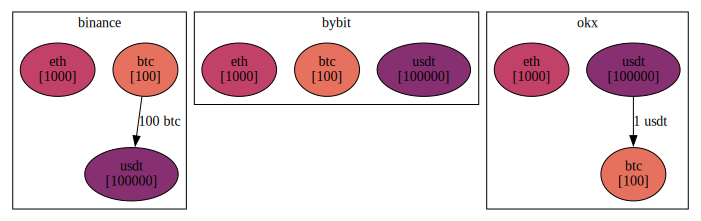

In [124]:
# Current proposition in graph representation
graph_code

In [125]:
# Current allocation
allocation_data

,exchange,currency,amount
0,bybit,usdt,99998.934146
1,bybit,btc,100.008529
2,bybit,eth,1000.043458
3,okx,usdt,100000.213593
4,okx,btc,99.987301
5,okx,eth,1000.962922
6,binance,usdt,100000.340096
7,binance,btc,100.599712
8,binance,eth,1000.591184


In [126]:
# Current quotes
quotes_data

,exchange,currency,amount
0,bybit,usdt,0.788213
1,bybit,btc,16217.938741
2,bybit,eth,9.741956
3,okx,usdt,-1.073480
4,okx,btc,16214.716728
5,okx,eth,10.379877
6,binance,usdt,2.332968
7,binance,btc,16216.013338
8,binance,eth,12.339793


In [127]:
# Current deals track
deals_data

,time,first_from_exchange,first_from_currency,first_to_exchange,first_to_currency,second_from_exchange,second_from_currency,second_to_exchange,second_to_currency,first_amount,second_amount
